In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from config import *


# Prot Save Dir
ProtSaveDir = dataDir / "Prot"
ProtSaveDir.mkdir(parents=True, exist_ok=True)

## 蛋白组数据处理






Each protein level was inverse-rank normalized, including NPX data below the LOD, before analyses and association testing.

>From :Plasma proteomic associations with genetics and health in the UK Biobank

So Load INT data 

In [14]:
pd.set_option("display.max_columns", 30)
ProtRawDir = "/home/xutingfeng/ukb/ukbData/omics/proteomics/Olink_v1_rankINT.pkl"
ProtRaw = pd.read_pickle(ProtRawDir)
ProtRaw

,eid,A1BG,AAMDC,AARSD1,ABCA2,ABHD14B,ABL1,ABO,ABRAXAS2,ACAA1,ACADM,ACADSB,ACAN,ACE,ACE2,...,YY1,ZBP1,ZBTB16,ZBTB17,ZCCHC8,ZFYVE19,ZHX2,ZNF174,ZNF75D,ZNF830,ZNRD2,ZNRF4,ZP3,ZP4,ZPR1
0,1000115,NaN,NaN,0.934509,NaN,-0.064088,-0.812176,NaN,NaN,-0.569278,NaN,NaN,1.251031,NaN,0.652651,...,NaN,NaN,-0.063372,-2.092370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000127,-0.916613,-0.474303,-0.775140,0.085337,-0.774343,-0.695950,-0.300759,-0.727099,0.878758,-0.210228,0.135437,0.578223,-0.858606,-0.183837,...,0.158575,-0.175290,-1.348387,-1.828152,-0.765631,-1.113554,-0.498362,-0.716155,0.153772,-0.676410,-0.421073,-1.104880,-0.266888,-1.277354,-0.434800
2,1000149,NaN,NaN,0.825572,NaN,-0.699350,1.053125,NaN,NaN,-0.200034,NaN,NaN,0.795489,NaN,0.992799,...,NaN,NaN,0.808623,-0.972956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000194,0.749057,0.618713,-0.772502,-0.167310,0.339988,0.870890,-0.593993,1.025140,-0.480002,0.883381,0.131880,0.792796,1.038091,-0.128494,...,0.586156,0.361838,0.924546,-0.775747,0.605956,1.247434,0.518151,0.775917,-0.380659,0.582146,0.742747,0.910472,0.905970,1.361464,-1.265805
4,1000258,-1.063681,1.326792,0.465411,0.282683,1.915093,-0.061332,0.928460,0.633582,0.421096,0.322320,-0.150365,-1.040709,-0.158832,-0.421779,...,-0.094948,-0.308188,0.485712,-0.904874,1.013660,0.859848,0.238133,-0.514464,0.219211,0.607379,-0.084747,1.114769,-0.016530,0.196330,-0.701078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53016,6023931,0.763786,1.520694,-0.411808,0.719357,0.690958,0.454327,0.513731,1.127797,NaN,NaN,1.145876,-0.843178,0.069591,0.486123,...,-0.883169,-0.977153,NaN,0.039684,-1.083027,0.937367,-1.299157,-1.608089,NaN,0.105568,0.944631,0.911324,2.313092,-0.649358,0.547785
53017,6024012,NaN,NaN,-1.573437,NaN,1.480561,-1.351503,NaN,NaN,0.837144,NaN,NaN,-0.181813,NaN,NaN,...,NaN,NaN,-1.524268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53018,6024020,-0.221175,0.499353,-0.641544,-1.794718,0.414795,-0.909685,0.140001,0.104461,-0.571330,-0.051782,0.663285,-0.189309,-0.420837,-1.317172,...,-0.890257,-0.523762,-0.828405,0.172860,-0.900410,-0.112989,-1.254046,0.328255,0.096543,-0.295744,0.297090,0.416711,0.375478,0.397723,0.323828
53019,6024098,-0.550390,-0.072938,0.533978,1.480747,-0.675799,0.308556,1.290115,-1.273087,-0.537052,1.576870,-0.285902,-0.046682,0.026984,1.510809,...,1.455198,1.330737,-1.092581,1.318235,-0.870860,0.063274,1.455601,1.131022,0.248504,-0.245405,1.264628,0.425989,-0.489543,-0.390759,0.683515


In [15]:
ProtRaw["eid"].value_counts()

eid
1000115    1
4361251    1
4360380    1
4360399    1
4360454    1
          ..
2666704    1
2666718    1
2666785    1
2666796    1
6024110    1
Name: count, Length: 53021, dtype: int64

#### Filter by missing rate

Text(0.5, 1.0, 'Missing rate of proteins')

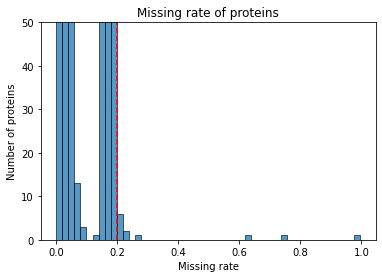

In [16]:
ProtRaw_missing_protein_rate = (
    ProtRaw.isna().sum(axis=0) / ProtRaw.shape[0]
).sort_values(ascending=False)
ProtRaw_missing_protein_rate

# sns.barplot()
fig, ax = plt.subplots(figsize=(6, 4))
sns.histplot(
    ProtRaw_missing_protein_rate,
    ax=ax,
)
ax.set_ylim(0, 50)
# ax.set_ylim(0, 30)
# ax.set_yticks([0, 1, 2, 5, 10, 15, 20, 25, 30])
# ax.set_xlim(0, 0.4)
# ax.set_xticks([0, 0.05, 0.1, 0.15, 0.2])
ax.vlines(0.2, 0, ax.get_ylim()[1], color="red", linestyle="--")
ax.set_xlabel("Missing rate")
ax.set_ylabel("Number of proteins")
ax.set_title("Missing rate of proteins")

**Filter out proteins with a missing rate exceeding 0.2.**



Proteins with more than 20% missingness due to quality control were excluded in the predictor models, with the remainder of missing measurements mean-imputed.
> From: Plasma proteomic associations with genetics and health in the UK Biobank


In [17]:
# filter rate 0.2
ProtRaw_filterProt = ProtRaw.loc[:, ProtRaw_missing_protein_rate < 0.2]
ProtRaw_filterProt

,eid,A1BG,AAMDC,AARSD1,ABCA2,ABHD14B,ABL1,ABO,ABRAXAS2,ACAA1,ACADM,ACADSB,ACAN,ACE,ACE2,...,YY1,ZBP1,ZBTB16,ZBTB17,ZCCHC8,ZFYVE19,ZHX2,ZNF174,ZNF75D,ZNF830,ZNRD2,ZNRF4,ZP3,ZP4,ZPR1
0,1000115,NaN,NaN,0.934509,NaN,-0.064088,-0.812176,NaN,NaN,-0.569278,NaN,NaN,1.251031,NaN,0.652651,...,NaN,NaN,-0.063372,-2.092370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000127,-0.916613,-0.474303,-0.775140,0.085337,-0.774343,-0.695950,-0.300759,-0.727099,0.878758,-0.210228,0.135437,0.578223,-0.858606,-0.183837,...,0.158575,-0.175290,-1.348387,-1.828152,-0.765631,-1.113554,-0.498362,-0.716155,0.153772,-0.676410,-0.421073,-1.104880,-0.266888,-1.277354,-0.434800
2,1000149,NaN,NaN,0.825572,NaN,-0.699350,1.053125,NaN,NaN,-0.200034,NaN,NaN,0.795489,NaN,0.992799,...,NaN,NaN,0.808623,-0.972956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000194,0.749057,0.618713,-0.772502,-0.167310,0.339988,0.870890,-0.593993,1.025140,-0.480002,0.883381,0.131880,0.792796,1.038091,-0.128494,...,0.586156,0.361838,0.924546,-0.775747,0.605956,1.247434,0.518151,0.775917,-0.380659,0.582146,0.742747,0.910472,0.905970,1.361464,-1.265805
4,1000258,-1.063681,1.326792,0.465411,0.282683,1.915093,-0.061332,0.928460,0.633582,0.421096,0.322320,-0.150365,-1.040709,-0.158832,-0.421779,...,-0.094948,-0.308188,0.485712,-0.904874,1.013660,0.859848,0.238133,-0.514464,0.219211,0.607379,-0.084747,1.114769,-0.016530,0.196330,-0.701078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53016,6023931,0.763786,1.520694,-0.411808,0.719357,0.690958,0.454327,0.513731,1.127797,NaN,NaN,1.145876,-0.843178,0.069591,0.486123,...,-0.883169,-0.977153,NaN,0.039684,-1.083027,0.937367,-1.299157,-1.608089,NaN,0.105568,0.944631,0.911324,2.313092,-0.649358,0.547785
53017,6024012,NaN,NaN,-1.573437,NaN,1.480561,-1.351503,NaN,NaN,0.837144,NaN,NaN,-0.181813,NaN,NaN,...,NaN,NaN,-1.524268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53018,6024020,-0.221175,0.499353,-0.641544,-1.794718,0.414795,-0.909685,0.140001,0.104461,-0.571330,-0.051782,0.663285,-0.189309,-0.420837,-1.317172,...,-0.890257,-0.523762,-0.828405,0.172860,-0.900410,-0.112989,-1.254046,0.328255,0.096543,-0.295744,0.297090,0.416711,0.375478,0.397723,0.323828
53019,6024098,-0.550390,-0.072938,0.533978,1.480747,-0.675799,0.308556,1.290115,-1.273087,-0.537052,1.576870,-0.285902,-0.046682,0.026984,1.510809,...,1.455198,1.330737,-1.092581,1.318235,-0.870860,0.063274,1.455601,1.131022,0.248504,-0.245405,1.264628,0.425989,-0.489543,-0.390759,0.683515


no ind level filter Now

In [18]:
# ProtRaw_filterProt_missInd = (
#     ProtRaw_filterProt.isna().sum(axis=1) / ProtRaw_filterProt.shape[1]
# ).sort_values(ascending=False)

# fig, ax = plt.subplots(figsize=(6, 4))
# sns.histplot(ProtRaw_filterProt_missInd, ax=ax, stat="density", kde=False)
# ax.set_xlabel("Missing rate")
# ax.set_ylabel("Density")
# ax.set_title("Missing rate by individuals of proteomics data")
# ax.vlines(0.2, 0, ax.get_ylim()[1], color="red", linestyle="--")
# # ax.v

In [19]:
# ProtRaw_filterInd_index = ProtRaw_filterProt_missInd[
#     ProtRaw_filterProt_missInd < 0.2
# ].index
# ProtRaw_filterInd = ProtRaw_filterProt.loc[ProtRaw_filterInd_index]
# ProtRaw_filterInd

In [104]:
ProtRaw_filterInd = ProtRaw_filterProt
ProtRaw_filterInd["eid"] = ProtRaw_filterInd["eid"].astype(str)
ProtRaw_filterInd.to_feather(ProtSaveDir / "Prot_noImpute.feather")

/tmp/ipykernel_1015894/2007130814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ProtRaw_filterInd["eid"] = ProtRaw_filterInd["eid"].astype(str)


In [105]:
from ppp_prediction.impute import impute

ProtImpute = impute(ProtRaw_filterInd[ProtRaw_filterInd.columns[1:]], method="mean")
ProtImpute

 raw data is (53021, 2911) and 47142 rows with na
Will use mean to replace na


,A1BG,AAMDC,AARSD1,ABCA2,ABHD14B,ABL1,ABO,ABRAXAS2,ACAA1,ACADM,ACADSB,ACAN,ACE,ACE2,ACHE,...,YY1,ZBP1,ZBTB16,ZBTB17,ZCCHC8,ZFYVE19,ZHX2,ZNF174,ZNF75D,ZNF830,ZNRD2,ZNRF4,ZP3,ZP4,ZPR1
0,-7.444882e-18,-1.792736e-17,0.934509,2.165139e-17,-0.064088,-0.812176,6.023429e-18,2.132334e-17,-5.692780e-01,1.195737e-17,-6.861737e-18,1.251031,6.023429e-18,6.526509e-01,-1.329906e-17,...,2.221824e-17,2.348436e-17,-6.337172e-02,-2.092370e+00,2.378372e-17,-6.054359e-18,3.180514e-18,2.123803e-17,1.163420e-17,1.753285e-17,-4.779757e-18,1.753285e-17,-1.825331e-17,-2.402094e-17,1.508096e-17
1,-9.166130e-01,-4.743035e-01,-0.775140,8.533724e-02,-0.774343,-0.695950,-3.007589e-01,-7.270990e-01,8.787575e-01,-2.102281e-01,1.354374e-01,0.578223,-8.586059e-01,-1.838374e-01,-3.114600e-01,...,1.585754e-01,-1.752897e-01,-1.348387e+00,-1.828152e+00,-7.656305e-01,-1.113554e+00,-4.983617e-01,-7.161554e-01,1.537722e-01,-6.764102e-01,-4.210729e-01,-1.104880e+00,-2.668875e-01,-1.277354e+00,-4.347995e-01
2,-7.444882e-18,-1.792736e-17,0.825572,2.165139e-17,-0.699350,1.053125,6.023429e-18,2.132334e-17,-2.000337e-01,1.195737e-17,-6.861737e-18,0.795489,6.023429e-18,9.927995e-01,-1.329906e-17,...,2.221824e-17,2.348436e-17,8.086232e-01,-9.729561e-01,2.378372e-17,-6.054359e-18,3.180514e-18,2.123803e-17,1.163420e-17,1.753285e-17,-4.779757e-18,1.753285e-17,-1.825331e-17,-2.402094e-17,1.508096e-17
3,7.490568e-01,6.187133e-01,-0.772502,-1.673101e-01,0.339988,0.870890,-5.939932e-01,1.025140e+00,-4.800018e-01,8.833812e-01,1.318798e-01,0.792796,1.038091e+00,-1.284936e-01,8.703940e-01,...,5.861563e-01,3.618376e-01,9.245457e-01,-7.757473e-01,6.059555e-01,1.247434e+00,5.181508e-01,7.759173e-01,-3.806593e-01,5.821463e-01,7.427472e-01,9.104725e-01,9.059703e-01,1.361464e+00,-1.265805e+00
4,-1.063681e+00,1.326792e+00,0.465411,2.826828e-01,1.915093,-0.061332,9.284597e-01,6.335818e-01,4.210957e-01,3.223204e-01,-1.503649e-01,-1.040709,-1.588315e-01,-4.217787e-01,-7.423063e-01,...,-9.494807e-02,-3.081878e-01,4.857125e-01,-9.048738e-01,1.013660e+00,8.598483e-01,2.381331e-01,-5.144642e-01,2.192113e-01,6.073792e-01,-8.474741e-02,1.114769e+00,-1.653022e-02,1.963296e-01,-7.010785e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53016,7.637857e-01,1.520694e+00,-0.411808,7.193575e-01,0.690958,0.454327,5.137313e-01,1.127797e+00,2.966068e-18,1.195737e-17,1.145876e+00,-0.843178,6.959111e-02,4.861227e-01,-1.329906e-17,...,-8.831694e-01,-9.771528e-01,1.977379e-18,3.968429e-02,-1.083027e+00,9.373672e-01,-1.299157e+00,-1.608089e+00,1.163420e-17,1.055681e-01,9.446306e-01,9.113239e-01,2.313092e+00,-6.493577e-01,5.477852e-01
53017,-7.444882e-18,-1.792736e-17,-1.573437,2.165139e-17,1.480561,-1.351503,6.023429e-18,2.132334e-17,8.371441e-01,1.195737e-17,-6.861737e-18,-0.181813,6.023429e-18,-9.272347e-18,-1.329906e-17,...,2.221824e-17,2.348436e-17,-1.524268e+00,-8.850876e-18,2.378372e-17,-6.054359e-18,3.180514e-18,2.123803e-17,1.163420e-17,1.753285e-17,-4.779757e-18,1.753285e-17,-1.825331e-17,-2.402094e-17,1.508096e-17
53018,-2.211754e-01,4.993533e-01,-0.641544,-1.794718e+00,0.414795,-0.909685,1.400013e-01,1.044607e-01,-5.713299e-01,-5.178229e-02,6.632853e-01,-0.189309,-4.208370e-01,-1.317172e+00,-6.380977e-01,...,-8.902567e-01,-5.237625e-01,-8.284048e-01,1.728597e-01,-9.004097e-01,-1.129890e-01,-1.254046e+00,3.282552e-01,9.654265e-02,-2.957442e-01,2.970895e-01,4.167107e-01,3.754783e-01,3.977226e-01,3.238283e-01
53019,-5.503899e-01,-7.293799e-02,0.533978,1.480747e+00,-0.675799,0.308556,1.290115e+00,-1.273087e+00,-5.370517e-01,1.576870e+00,-2.859019e-01,-0.046682,2.698408e-02,1.510809e+00,2.758077e-02,...,1.455198e+00,1.330737e+00,-1.092581e+00,1.318235e+00,-8.708602e-01,6.327382e-02,1.455601e+00,1.131022e+00,2.485042e-01,-2.454048e-01,1.264628e+00,4.259894e-01,-4.895429e-01,-3.907594e-01,6.835149e-01


In [107]:
Prot = ProtRaw_filterInd[["eid"]].merge(ProtImpute, left_index=True, right_index=True)
Prot

,eid,A1BG,AAMDC,AARSD1,ABCA2,ABHD14B,ABL1,ABO,ABRAXAS2,ACAA1,ACADM,ACADSB,ACAN,ACE,ACE2,...,YY1,ZBP1,ZBTB16,ZBTB17,ZCCHC8,ZFYVE19,ZHX2,ZNF174,ZNF75D,ZNF830,ZNRD2,ZNRF4,ZP3,ZP4,ZPR1
0,1000115,-7.444882e-18,-1.792736e-17,0.934509,2.165139e-17,-0.064088,-0.812176,6.023429e-18,2.132334e-17,-5.692780e-01,1.195737e-17,-6.861737e-18,1.251031,6.023429e-18,6.526509e-01,...,2.221824e-17,2.348436e-17,-6.337172e-02,-2.092370e+00,2.378372e-17,-6.054359e-18,3.180514e-18,2.123803e-17,1.163420e-17,1.753285e-17,-4.779757e-18,1.753285e-17,-1.825331e-17,-2.402094e-17,1.508096e-17
1,1000127,-9.166130e-01,-4.743035e-01,-0.775140,8.533724e-02,-0.774343,-0.695950,-3.007589e-01,-7.270990e-01,8.787575e-01,-2.102281e-01,1.354374e-01,0.578223,-8.586059e-01,-1.838374e-01,...,1.585754e-01,-1.752897e-01,-1.348387e+00,-1.828152e+00,-7.656305e-01,-1.113554e+00,-4.983617e-01,-7.161554e-01,1.537722e-01,-6.764102e-01,-4.210729e-01,-1.104880e+00,-2.668875e-01,-1.277354e+00,-4.347995e-01
2,1000149,-7.444882e-18,-1.792736e-17,0.825572,2.165139e-17,-0.699350,1.053125,6.023429e-18,2.132334e-17,-2.000337e-01,1.195737e-17,-6.861737e-18,0.795489,6.023429e-18,9.927995e-01,...,2.221824e-17,2.348436e-17,8.086232e-01,-9.729561e-01,2.378372e-17,-6.054359e-18,3.180514e-18,2.123803e-17,1.163420e-17,1.753285e-17,-4.779757e-18,1.753285e-17,-1.825331e-17,-2.402094e-17,1.508096e-17
3,1000194,7.490568e-01,6.187133e-01,-0.772502,-1.673101e-01,0.339988,0.870890,-5.939932e-01,1.025140e+00,-4.800018e-01,8.833812e-01,1.318798e-01,0.792796,1.038091e+00,-1.284936e-01,...,5.861563e-01,3.618376e-01,9.245457e-01,-7.757473e-01,6.059555e-01,1.247434e+00,5.181508e-01,7.759173e-01,-3.806593e-01,5.821463e-01,7.427472e-01,9.104725e-01,9.059703e-01,1.361464e+00,-1.265805e+00
4,1000258,-1.063681e+00,1.326792e+00,0.465411,2.826828e-01,1.915093,-0.061332,9.284597e-01,6.335818e-01,4.210957e-01,3.223204e-01,-1.503649e-01,-1.040709,-1.588315e-01,-4.217787e-01,...,-9.494807e-02,-3.081878e-01,4.857125e-01,-9.048738e-01,1.013660e+00,8.598483e-01,2.381331e-01,-5.144642e-01,2.192113e-01,6.073792e-01,-8.474741e-02,1.114769e+00,-1.653022e-02,1.963296e-01,-7.010785e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53016,6023931,7.637857e-01,1.520694e+00,-0.411808,7.193575e-01,0.690958,0.454327,5.137313e-01,1.127797e+00,2.966068e-18,1.195737e-17,1.145876e+00,-0.843178,6.959111e-02,4.861227e-01,...,-8.831694e-01,-9.771528e-01,1.977379e-18,3.968429e-02,-1.083027e+00,9.373672e-01,-1.299157e+00,-1.608089e+00,1.163420e-17,1.055681e-01,9.446306e-01,9.113239e-01,2.313092e+00,-6.493577e-01,5.477852e-01
53017,6024012,-7.444882e-18,-1.792736e-17,-1.573437,2.165139e-17,1.480561,-1.351503,6.023429e-18,2.132334e-17,8.371441e-01,1.195737e-17,-6.861737e-18,-0.181813,6.023429e-18,-9.272347e-18,...,2.221824e-17,2.348436e-17,-1.524268e+00,-8.850876e-18,2.378372e-17,-6.054359e-18,3.180514e-18,2.123803e-17,1.163420e-17,1.753285e-17,-4.779757e-18,1.753285e-17,-1.825331e-17,-2.402094e-17,1.508096e-17
53018,6024020,-2.211754e-01,4.993533e-01,-0.641544,-1.794718e+00,0.414795,-0.909685,1.400013e-01,1.044607e-01,-5.713299e-01,-5.178229e-02,6.632853e-01,-0.189309,-4.208370e-01,-1.317172e+00,...,-8.902567e-01,-5.237625e-01,-8.284048e-01,1.728597e-01,-9.004097e-01,-1.129890e-01,-1.254046e+00,3.282552e-01,9.654265e-02,-2.957442e-01,2.970895e-01,4.167107e-01,3.754783e-01,3.977226e-01,3.238283e-01
53019,6024098,-5.503899e-01,-7.293799e-02,0.533978,1.480747e+00,-0.675799,0.308556,1.290115e+00,-1.273087e+00,-5.370517e-01,1.576870e+00,-2.859019e-01,-0.046682,2.698408e-02,1.510809e+00,...,1.455198e+00,1.330737e+00,-1.092581e+00,1.318235e+00,-8.708602e-01,6.327382e-02,1.455601e+00,1.131022e+00,2.485042e-01,-2.454048e-01,1.264628e+00,4.259894e-01,-4.895429e-01,-3.907594e-01,6.835149e-01


In [108]:
Prot.to_feather(ProtSaveDir / "Prot_meanImpute.feather")

## 疾病定义

目前包含全部疾病来源于：[Lancet digital health](https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(21)02391-6/fulltext)


致死性疾病包含以下：
- 心肌梗死

In [48]:
Lancet_digital_health_data_dir = "/home/xutingfeng/ukb/ukbData/phenotypes/ukb_ph/disease_extracted/Lancet_Digital_Health_2019"  # should come from yours!!!!

tgt_dir = str((dataDir).absolute())

In [ ]:
# create soft link
# print(f"ln -s {Lancet_digital_health_data_dir} {tgt_dir}/")
!ln -s {Lancet_digital_health_data_dir} {tgt_dir}/

产生表型的发病率


In [75]:
rate_save_dir = dataDir / "Rate"
rate_save_dir.mkdir(parents=True, exist_ok=True)

In [ ]:

disease_list = list(
    Path(tgt_dir / Path(Path(Lancet_digital_health_data_dir).name)).rglob("*.feather")
)

res_dict = {
    "event": [],
    "incident": [],
    "prevalent": [],
}
for disease in disease_list:
    print(disease.stem)
    df = pd.read_feather(disease)
    for col in ["event", "incident", "prevalent"]:
        case = int(df[col].sum())
        control = int(df.shape[0] - case)
        rate = case / df.shape[0]
        res_dict[col].append(
            pd.DataFrame(
                {
                    "Phenotype": [disease.stem],
                    "Case": [case],
                    "Control": [control],
                    "Rate": [rate],
                }
            )
        )

/home/xutingfeng/ukb/project/Medical_tabPFN/V1/data/Lancet_Digital_Health_2019/lichen_planus.feather
/home/xutingfeng/ukb/project/Medical_tabPFN/V1/data/Lancet_Digital_Health_2019/varices.feather
/home/xutingfeng/ukb/project/Medical_tabPFN/V1/data/Lancet_Digital_Health_2019/pri_biliary.feather
/home/xutingfeng/ukb/project/Medical_tabPFN/V1/data/Lancet_Digital_Health_2019/aplastic.feather
/home/xutingfeng/ukb/project/Medical_tabPFN/V1/data/Lancet_Digital_Health_2019/hypertension.feather
/home/xutingfeng/ukb/project/Medical_tabPFN/V1/data/Lancet_Digital_Health_2019/rh_fever.feather
/home/xutingfeng/ukb/project/Medical_tabPFN/V1/data/Lancet_Digital_Health_2019/bronchiectasis.feather
/home/xutingfeng/ukb/project/Medical_tabPFN/V1/data/Lancet_Digital_Health_2019/meniere.feather
/home/xutingfeng/ukb/project/Medical_tabPFN/V1/data/Lancet_Digital_Health_2019/oesoph_ulc.feather
/home/xutingfeng/ukb/project/Medical_tabPFN/V1/data/Lancet_Digital_Health_2019/GN.feather
/home/xutingfeng/ukb/project

In [76]:
event_df = (
    pd.concat(res_dict["event"])
    .sort_values("Rate", ascending=False)
    .reset_index(drop=True)
)
incident_df = (
    pd.concat(res_dict["incident"])
    .sort_values("Rate", ascending=False)
    .reset_index(drop=True)
)
prevalent_df = (
    pd.concat(res_dict["prevalent"])
    .sort_values("Rate", ascending=False)
    .reset_index(drop=True)
)

event_df.to_csv(rate_save_dir / "event_rate.csv", index=False)
incident_df.to_csv(rate_save_dir / "incident_rate.csv", index=False)
prevalent_df.to_csv(rate_save_dir / "prevalent_rate.csv", index=False)
event_df

,Phenotype,Case,Control,Rate
0,hypertension,162516,339893,0.323474
1,oth_organisms,82802,419607,0.164810
2,diverticuli,70050,432359,0.139428
3,benign_colon,58879,443530,0.117193
4,oth_organs,44536,457873,0.088645
5,oesoph_ulc,38071,464338,0.075777
6,depression,33623,468786,0.066924
7,stable_angina,31168,471241,0.062037
8,IDA,25112,477297,0.049983
9,intervert_disc,20677,481732,0.041156


In [77]:
incident_df

,Phenotype,Case,Control,Rate
0,hypertension,122602,379807,0.244028
1,oth_organisms,68005,434404,0.135358
2,diverticuli,58862,443547,0.117160
3,benign_colon,47754,454655,0.095050
4,oth_organs,33805,468604,0.067286
5,depression,28779,473630,0.057282
6,oesoph_ulc,23629,478780,0.047031
7,IDA,21537,480872,0.042867
8,stable_angina,20940,481469,0.041679
9,pleural_effusion,16962,485447,0.033761


In [78]:
prevalent_df

,Phenotype,Case,Control,Rate
0,hypertension,39914,462495,0.079445
1,oth_organisms,14797,487612,0.029452
2,oesoph_ulc,14442,487967,0.028746
3,diverticuli,11188,491221,0.022269
4,menorrhagia,11184,491225,0.022261
5,benign_colon,11125,491284,0.022143
6,oth_organs,10731,491678,0.021359
7,stable_angina,10228,492181,0.020358
8,PMB,7770,494639,0.015465
9,benign_uterus,6580,495829,0.013097


## 相关协变量提取

- age
- sex 
- PC1-PC10
- assessment_center
- ethnic
<!-- - genotype_array -->

In [99]:
data = pd.read_feather(
    "/home/xutingfeng/ukb/ukbData/phenotypes/ukb_ph/phewas/cov_v6.feather"
)
data

,eid,sex,height,weight,BSA,age,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,pravastatin,rosuvastatin,simvador_10mg_tablet,simvastatin,zocor_10mg_tablet,zocor_heart_pro_10mg_tablet,lipid_lowering_drug,drug_tg,drug_ldl,drug_hdl,drug_tc,drug_sbp,drug_dbp,genotype_array,assessment_center
0,1000017,1.0,172.0,89.5,2.067876,56.0,-11.3690,3.56718,-1.975530,0.213937,-12.43420,-1.698380,-0.090687,-3.498190,4.762600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1
1,1000025,1.0,176.0,113.9,2.359755,62.0,-12.1620,2.77470,0.175048,2.554930,8.75958,-0.044124,-1.497300,0.052680,0.276735,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2,2
2,1000038,1.0,179.5,112.2,2.365252,60.0,-12.8698,6.41566,-5.106100,-1.296310,-6.34291,-2.935870,1.690630,-1.932100,3.712410,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,3
3,1000042,1.0,169.0,77.1,1.902476,60.0,72.9437,-109.21600,74.692200,17.863400,-1.44577,-0.571180,-2.228180,1.646810,1.608430,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2,3
4,1000056,0.0,163.0,72.0,1.805547,65.0,-10.7174,5.77507,0.620341,0.505251,-2.49160,1.052860,0.290698,1.672830,-1.928450,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502404,6024086,0.0,154.0,88.0,1.940218,66.0,-11.1845,4.08367,-0.006942,-0.325017,-5.32889,2.483810,-1.063800,-3.733520,3.016760,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,8
502405,6024098,1.0,173.0,81.3,1.976592,68.0,-13.3426,2.56658,-0.076882,6.048100,11.09400,1.417840,2.647870,1.042270,-2.291610,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2,9
502406,6024103,1.0,187.0,111.3,2.404458,61.0,-12.2113,4.22902,-2.629170,4.489250,-2.29320,0.573617,1.350590,-1.911610,1.115080,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2,20
502407,6024110,1.0,177.0,73.2,1.897103,66.0,-10.5527,6.84118,-2.149580,-0.825010,-2.83187,-1.727010,1.742680,0.109792,-0.305446,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,11


In [100]:
# load ethnic data

ethnic = pd.read_csv(
    "/home/xutingfeng/ukb/ukbData/phenotypes/ukb_ph/covariates/ethnic.tsv.gz",
    sep="\s+",
)
ethnic["eid"] = ethnic["eid"].astype(str)
ethnic

,eid,Ethnic
0,1000017,White
1,1000025,White
2,1000038,White
3,1000042,Asian
4,1000056,White
...,...,...
502404,6024086,White
502405,6024098,White
502406,6024103,White
502407,6024110,White


In [101]:
# load ancestry data

ancestry = pd.read_csv(
    "/home/xutingfeng/ukb/ukbData/phenotypes/ukb_ph/covariates/inferred_ancestry.tsv.gz",
    sep="\s+",
)
ancestry["eid"] = ancestry["eid"].astype(str)
ancestry

,eid,ancestry,ancestry_high_confi
0,-1,AFR,AFR
1,-2,EUR,EUR
2,-3,EUR,EUR
3,-4,EUR,EUR
4,-5,EUR,EUR
...,...,...,...
488372,6024086,EUR,EUR
488373,6024098,EUR,EUR
488374,6024103,EUR,EUR
488375,6024110,EUR,EUR


In [102]:
data = data.merge(ancestry, on="eid", how="left").merge(ethnic, on="eid", how="left")
data

,eid,sex,height,weight,BSA,age,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,simvastatin,zocor_10mg_tablet,zocor_heart_pro_10mg_tablet,lipid_lowering_drug,drug_tg,drug_ldl,drug_hdl,drug_tc,drug_sbp,drug_dbp,genotype_array,assessment_center,ancestry,ancestry_high_confi,Ethnic
0,1000017,1.0,172.0,89.5,2.067876,56.0,-11.3690,3.56718,-1.975530,0.213937,-12.43420,-1.698380,-0.090687,-3.498190,4.762600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1,EUR,EUR,White
1,1000025,1.0,176.0,113.9,2.359755,62.0,-12.1620,2.77470,0.175048,2.554930,8.75958,-0.044124,-1.497300,0.052680,0.276735,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2,2,EUR,EUR,White
2,1000038,1.0,179.5,112.2,2.365252,60.0,-12.8698,6.41566,-5.106100,-1.296310,-6.34291,-2.935870,1.690630,-1.932100,3.712410,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,3,EUR,EUR,White
3,1000042,1.0,169.0,77.1,1.902476,60.0,72.9437,-109.21600,74.692200,17.863400,-1.44577,-0.571180,-2.228180,1.646810,1.608430,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2,3,SAS,SAS,Asian
4,1000056,0.0,163.0,72.0,1.805547,65.0,-10.7174,5.77507,0.620341,0.505251,-2.49160,1.052860,0.290698,1.672830,-1.928450,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,4,EUR,EUR,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502404,6024086,0.0,154.0,88.0,1.940218,66.0,-11.1845,4.08367,-0.006942,-0.325017,-5.32889,2.483810,-1.063800,-3.733520,3.016760,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,8,EUR,EUR,White
502405,6024098,1.0,173.0,81.3,1.976592,68.0,-13.3426,2.56658,-0.076882,6.048100,11.09400,1.417840,2.647870,1.042270,-2.291610,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2,9,EUR,EUR,White
502406,6024103,1.0,187.0,111.3,2.404458,61.0,-12.2113,4.22902,-2.629170,4.489250,-2.29320,0.573617,1.350590,-1.911610,1.115080,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2,20,EUR,EUR,White
502407,6024110,1.0,177.0,73.2,1.897103,66.0,-10.5527,6.84118,-2.149580,-0.825010,-2.83187,-1.727010,1.742680,0.109792,-0.305446,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,11,EUR,EUR,White


In [103]:
data.to_feather(dataDir / "covariates.feather")